In [1]:
%load_ext autoreload
%autoreload 2
# this only works on startup!
from jax import config
config.update("jax_enable_x64", True)

import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID" 
os.environ["CUDA_VISIBLE_DEVICES"] = '3'
from encoding_information.gpu_utils import limit_gpu_memory_growth
limit_gpu_memory_growth()

from cleanplots import *
from tqdm import tqdm
from signal_utils_1D import *


2024-01-21 22:10:07.314343: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-21 22:10:07.999648: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2024-01-21 22:10:07.999719: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2024-01-21 22:10:07.999727: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.


In [2]:
N_objects = 2000
num_bootstraps = 11
confidence = 90

objects_dict = {
  'delta_uniform': lambda : np.array([generate_random_object('delta', num_deltas=1, gaussian_mixture_position=False) for i in range(N_objects)]),
  # 'delta_nonuniform': lambda: np.array([generate_random_object('delta', num_deltas=1, gaussian_mixture_position=True) for i in range(N_objects)]),
  'white_noise': lambda : np.array([generate_random_object('white_noise') for i in range(N_objects)]),
  # 'pink_noise': lambda : np.array([sample_amplitude_object('pink_noise') for i in range(N_objects)]),
  '8_deltas_uniform': lambda :np.array([generate_random_object('delta', num_deltas=8, gaussian_mixture_position=False) for i in range(N_objects)]),
  # '8_deltas_nonuniform': lambda : np.array([sample_amplitude_object('delta', num_deltas=8, gaussian_mixture_position=True) for i in range(N_objects)]),
}


noise_sigma_list = [1e-6, 1e-5, 1e-4, 1e-3, 4e-3]

num_nyquist_samples = 16

mi_by_object = {}
mi_by_object_lo = {}
mi_by_object_hi = {}
for name, objects_fn in objects_dict.items():
  print(name)
  mutual_information = []
  mi_lo = []
  mi_hi = []
  for noise_sigma in tqdm(noise_sigma_list):
    results = []
    for k in range(num_bootstraps):
      initial_kernel, initial_params, optimized_params, objects, initial_mi, optimized_mi = optimize_PSF_and_estimate_mi(
        objects_fn, noise_sigma, num_nyquist_samples=num_nyquist_samples, verbose=True)
      results.append(optimized_mi)
    mutual_information.append(np.median(np.array(results)))
    mi_lo.append(np.percentile(np.array(results), 100-confidence))
    mi_hi.append(np.percentile(np.array(results), confidence))
  mi_by_object[name] = mutual_information
  mi_by_object_lo[name] = mi_lo
  mi_by_object_hi[name] = mi_hi

delta_uniform


  0%|          | 0/5 [00:00<?, ?it/s]

initial loss -13.099183871512416
computing initial mi


2024-01-21 22:11:45.604939: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.


computing optimized mi
initial loss -13.669548127379716
computing initial mi
computing optimized mi
initial loss -13.852938109716256
computing initial mi
computing optimized mi
initial loss -13.550525627320841
computing initial mi
computing optimized mi
initial loss -13.495092634581178
computing initial mi
computing optimized mi
initial loss -13.806415711713509
computing initial mi
computing optimized mi
initial loss -13.491563027955497
computing initial mi
computing optimized mi
initial loss -13.944241966692406
computing initial mi
computing optimized mi
initial loss -13.32210897534109
computing initial mi
computing optimized mi
initial loss -13.509991005916909
computing initial mi
computing optimized mi
initial loss -13.374927957537592
computing initial mi
computing optimized mi


 20%|██        | 1/5 [18:04<1:12:19, 1084.77s/it]

initial loss -10.161981638463386
computing initial mi
computing optimized mi
initial loss -10.5971532125279
computing initial mi
computing optimized mi
initial loss -9.8642642647067
computing initial mi
computing optimized mi
initial loss -10.049536613288033
computing initial mi
computing optimized mi
initial loss -10.586962903090864
computing initial mi
computing optimized mi
initial loss -10.253762606660697
computing initial mi
computing optimized mi
initial loss -10.497659175392588
computing initial mi
computing optimized mi
initial loss -10.212703199860947
computing initial mi
computing optimized mi
initial loss -10.385978932282782
computing initial mi
computing optimized mi
initial loss -10.03766039821878
computing initial mi
computing optimized mi
initial loss -10.212662065985786
computing initial mi
computing optimized mi


 40%|████      | 2/5 [36:04<54:04, 1081.57s/it]  

initial loss -7.799631924742252
computing initial mi
computing optimized mi
initial loss -6.95683891527679
computing initial mi
computing optimized mi
initial loss -6.955460165989175
computing initial mi
computing optimized mi
initial loss -7.471823739738815
computing initial mi
computing optimized mi
initial loss -7.494406628927511
computing initial mi
computing optimized mi
initial loss -7.296025356141808
computing initial mi
computing optimized mi
initial loss -7.792656581370716
computing initial mi
computing optimized mi
initial loss -7.550995393165916
computing initial mi
computing optimized mi
initial loss -7.344977443101506
computing initial mi
computing optimized mi
initial loss -6.321538488809703
computing initial mi
computing optimized mi
initial loss -7.069266543741769
computing initial mi
computing optimized mi


 60%|██████    | 3/5 [54:02<36:00, 1080.16s/it]

initial loss -4.141013028663004
computing initial mi
computing optimized mi


/home/hpinkard_waller/GitRepos/EncodingInformation/encoding_information/information_estimation.py:223: UserWarning: 0.00% of pixels are negative.
  warnings.warn(f"{np.sum(clean_images_if_available < 0) / clean_images_if_available.size:.2%} of pixels are negative.")


initial loss -4.182675084083273
computing initial mi
computing optimized mi


/home/hpinkard_waller/GitRepos/EncodingInformation/encoding_information/information_estimation.py:223: UserWarning: 0.02% of pixels are negative.
  warnings.warn(f"{np.sum(clean_images_if_available < 0) / clean_images_if_available.size:.2%} of pixels are negative.")


initial loss -4.477731624298148
computing initial mi
computing optimized mi
initial loss -3.828009172092795
computing initial mi
computing optimized mi
initial loss -4.131854575128684
computing initial mi
computing optimized mi
initial loss -4.234413888008762
computing initial mi
computing optimized mi
initial loss -4.035419366191985
computing initial mi
computing optimized mi


/home/hpinkard_waller/GitRepos/EncodingInformation/encoding_information/information_estimation.py:223: UserWarning: 0.03% of pixels are negative.
  warnings.warn(f"{np.sum(clean_images_if_available < 0) / clean_images_if_available.size:.2%} of pixels are negative.")


initial loss -3.8570059448859633
computing initial mi
computing optimized mi
initial loss -4.442190877550013
computing initial mi
computing optimized mi
initial loss -4.11593541320807
computing initial mi
computing optimized mi
initial loss -4.2728552734833665
computing initial mi
computing optimized mi


/home/hpinkard_waller/GitRepos/EncodingInformation/encoding_information/information_estimation.py:223: UserWarning: 0.01% of pixels are negative.
  warnings.warn(f"{np.sum(clean_images_if_available < 0) / clean_images_if_available.size:.2%} of pixels are negative.")
 80%|████████  | 4/5 [1:11:53<17:56, 1076.63s/it]

initial loss -1.5487345208204863
computing initial mi
computing optimized mi


/home/hpinkard_waller/GitRepos/EncodingInformation/encoding_information/information_estimation.py:223: UserWarning: 3.98% of pixels are negative.
  warnings.warn(f"{np.sum(clean_images_if_available < 0) / clean_images_if_available.size:.2%} of pixels are negative.")


initial loss -2.2794485854811524
computing initial mi
computing optimized mi


/home/hpinkard_waller/GitRepos/EncodingInformation/encoding_information/information_estimation.py:223: UserWarning: 4.17% of pixels are negative.
  warnings.warn(f"{np.sum(clean_images_if_available < 0) / clean_images_if_available.size:.2%} of pixels are negative.")


initial loss -2.5428880708033836
computing initial mi


/home/hpinkard_waller/GitRepos/EncodingInformation/encoding_information/information_estimation.py:223: UserWarning: 0.05% of pixels are negative.
  warnings.warn(f"{np.sum(clean_images_if_available < 0) / clean_images_if_available.size:.2%} of pixels are negative.")


computing optimized mi


/home/hpinkard_waller/GitRepos/EncodingInformation/encoding_information/information_estimation.py:223: UserWarning: 4.01% of pixels are negative.
  warnings.warn(f"{np.sum(clean_images_if_available < 0) / clean_images_if_available.size:.2%} of pixels are negative.")


initial loss -2.3742449816835465
computing initial mi
computing optimized mi


/home/hpinkard_waller/GitRepos/EncodingInformation/encoding_information/information_estimation.py:223: UserWarning: 3.96% of pixels are negative.
  warnings.warn(f"{np.sum(clean_images_if_available < 0) / clean_images_if_available.size:.2%} of pixels are negative.")


initial loss -2.338349615616003
computing initial mi
computing optimized mi


/home/hpinkard_waller/GitRepos/EncodingInformation/encoding_information/information_estimation.py:223: UserWarning: 4.03% of pixels are negative.
  warnings.warn(f"{np.sum(clean_images_if_available < 0) / clean_images_if_available.size:.2%} of pixels are negative.")


initial loss -1.9092859013485128
computing initial mi
computing optimized mi
initial loss -1.9044114351379415
computing initial mi
computing optimized mi
initial loss -2.455417983168555
computing initial mi


/home/hpinkard_waller/GitRepos/EncodingInformation/encoding_information/information_estimation.py:223: UserWarning: 0.06% of pixels are negative.
  warnings.warn(f"{np.sum(clean_images_if_available < 0) / clean_images_if_available.size:.2%} of pixels are negative.")


computing optimized mi


/home/hpinkard_waller/GitRepos/EncodingInformation/encoding_information/information_estimation.py:223: UserWarning: 4.33% of pixels are negative.
  warnings.warn(f"{np.sum(clean_images_if_available < 0) / clean_images_if_available.size:.2%} of pixels are negative.")


initial loss -2.1020191775146717
computing initial mi


/home/hpinkard_waller/GitRepos/EncodingInformation/encoding_information/information_estimation.py:223: UserWarning: 0.22% of pixels are negative.
  warnings.warn(f"{np.sum(clean_images_if_available < 0) / clean_images_if_available.size:.2%} of pixels are negative.")


computing optimized mi


/home/hpinkard_waller/GitRepos/EncodingInformation/encoding_information/information_estimation.py:223: UserWarning: 4.18% of pixels are negative.
  warnings.warn(f"{np.sum(clean_images_if_available < 0) / clean_images_if_available.size:.2%} of pixels are negative.")


initial loss -1.8334176010801015
computing initial mi
computing optimized mi


/home/hpinkard_waller/GitRepos/EncodingInformation/encoding_information/information_estimation.py:223: UserWarning: 4.25% of pixels are negative.
  warnings.warn(f"{np.sum(clean_images_if_available < 0) / clean_images_if_available.size:.2%} of pixels are negative.")


initial loss -1.9079762033611742
computing initial mi
computing optimized mi


/home/hpinkard_waller/GitRepos/EncodingInformation/encoding_information/information_estimation.py:223: UserWarning: 4.23% of pixels are negative.
  warnings.warn(f"{np.sum(clean_images_if_available < 0) / clean_images_if_available.size:.2%} of pixels are negative.")
100%|██████████| 5/5 [1:29:28<00:00, 1073.77s/it]


white_noise


  0%|          | 0/5 [00:00<?, ?it/s]

initial loss -7.437835112399617
computing initial mi
computing optimized mi
initial loss -8.029181383919983
computing initial mi
computing optimized mi
initial loss -8.009312810995029
computing initial mi
computing optimized mi
initial loss -7.694169378095684
computing initial mi
computing optimized mi
initial loss -8.17325306415636
computing initial mi
computing optimized mi
initial loss -8.076874686232543
computing initial mi
computing optimized mi
initial loss -8.109809501468508
computing initial mi
computing optimized mi
initial loss -7.91833087585942
computing initial mi
computing optimized mi
initial loss -7.9769018223473935
computing initial mi
computing optimized mi
initial loss -7.8916945216719565
computing initial mi
computing optimized mi
initial loss -7.91124555027476
computing initial mi
computing optimized mi


 20%|██        | 1/5 [18:27<1:13:49, 1107.34s/it]

initial loss -4.528706157579709
computing initial mi
computing optimized mi
initial loss -4.505765520020859
computing initial mi
computing optimized mi
initial loss -4.679465453884948
computing initial mi
computing optimized mi
initial loss -4.412813191797303
computing initial mi
computing optimized mi
initial loss -4.341622662227854
computing initial mi
computing optimized mi
initial loss -5.01036980046381
computing initial mi
computing optimized mi
initial loss -3.9984974723014775
computing initial mi
computing optimized mi
initial loss -4.078799661054671
computing initial mi
computing optimized mi
initial loss -4.393310892980008
computing initial mi
computing optimized mi
initial loss -4.684053296484182
computing initial mi
computing optimized mi
initial loss -4.609575913969183
computing initial mi
computing optimized mi


 40%|████      | 2/5 [36:48<55:11, 1103.77s/it]  

initial loss -1.8050599712427697
computing initial mi
computing optimized mi
initial loss -1.5485959321476237
computing initial mi
computing optimized mi
initial loss -1.8521476998519675
computing initial mi
computing optimized mi
initial loss -2.0320088838958026
computing initial mi
computing optimized mi
initial loss -1.3178183529332448
computing initial mi
computing optimized mi
initial loss -1.8674183372852324
computing initial mi
computing optimized mi
initial loss -1.6669864871058078
computing initial mi
computing optimized mi
initial loss -1.5598684141000074
computing initial mi
computing optimized mi
initial loss -1.9379050966194848
computing initial mi
computing optimized mi
initial loss -1.2664093812845625
computing initial mi
computing optimized mi
initial loss -1.5149505654604356
computing initial mi
computing optimized mi


 60%|██████    | 3/5 [55:17<36:52, 1106.21s/it]

initial loss -0.08924887795823477
computing initial mi
computing optimized mi
initial loss -0.12910184274259512
computing initial mi
computing optimized mi
initial loss -0.06839622062139715
computing initial mi
computing optimized mi
initial loss -0.0862456570639532
computing initial mi
computing optimized mi
initial loss -0.12026622760296055
computing initial mi
computing optimized mi
initial loss -0.1345558329769927
computing initial mi
computing optimized mi
initial loss -0.060783807854653385
computing initial mi
computing optimized mi
initial loss -0.0940923145577737
computing initial mi
computing optimized mi
initial loss -0.08951137583928548
computing initial mi
computing optimized mi
initial loss -0.10981350339697839
computing initial mi
computing optimized mi
initial loss -0.06260702577645663
computing initial mi
computing optimized mi


 80%|████████  | 4/5 [1:13:36<18:23, 1103.38s/it]

initial loss -0.0021198330986299334
computing initial mi
computing optimized mi
initial loss -0.009339190744228015
computing initial mi
computing optimized mi
initial loss -0.00702713636358563
computing initial mi
computing optimized mi
initial loss -0.021450267895505377
computing initial mi
computing optimized mi
initial loss -0.013095040951091706
computing initial mi
computing optimized mi
initial loss -0.0024250257458768246
computing initial mi
computing optimized mi
initial loss -0.00699410462244909
computing initial mi
computing optimized mi
initial loss -0.009847208330100433
computing initial mi
computing optimized mi
initial loss 0.00019238887323343471
computing initial mi
computing optimized mi
initial loss -0.010576124827736242
computing initial mi
computing optimized mi
initial loss -0.022834594678016094
computing initial mi
computing optimized mi


100%|██████████| 5/5 [1:31:53<00:00, 1102.66s/it]


8_deltas_uniform


  0%|          | 0/5 [00:00<?, ?it/s]

initial loss -12.056346144521587
computing initial mi
computing optimized mi
initial loss -12.094302746592115
computing initial mi
computing optimized mi
initial loss -12.103831621079955
computing initial mi
computing optimized mi
initial loss -12.181846787032448
computing initial mi
computing optimized mi
initial loss -12.453539774113107
computing initial mi
computing optimized mi
initial loss -12.518998385375312
computing initial mi
computing optimized mi
initial loss -12.024801521872604
computing initial mi
computing optimized mi
initial loss -12.166779936640488
computing initial mi
computing optimized mi
initial loss -11.915741936393037
computing initial mi
computing optimized mi
initial loss -12.442317119917597
computing initial mi
computing optimized mi
initial loss -12.339293546673568
computing initial mi
computing optimized mi


 20%|██        | 1/5 [17:49<1:11:18, 1069.71s/it]

initial loss -9.116194768113498
computing initial mi
computing optimized mi
initial loss -8.809717854883118
computing initial mi
computing optimized mi
initial loss -8.946829645098433
computing initial mi
computing optimized mi
initial loss -8.83042801438615
computing initial mi
computing optimized mi
initial loss -8.778677970345175
computing initial mi
computing optimized mi
initial loss -9.011126277026884
computing initial mi
computing optimized mi
initial loss -9.289925860737055
computing initial mi
computing optimized mi
initial loss -8.870852834588927
computing initial mi
computing optimized mi
initial loss -8.813899276454098
computing initial mi
computing optimized mi
initial loss -8.904632277333722
computing initial mi
computing optimized mi
initial loss -8.475508391412
computing initial mi
computing optimized mi


 40%|████      | 2/5 [35:30<53:13, 1064.39s/it]  

initial loss -5.817148618430222
computing initial mi
computing optimized mi
initial loss -6.058736204919615
computing initial mi
computing optimized mi
initial loss -5.571698973005956
computing initial mi
computing optimized mi
initial loss -6.086220073433925
computing initial mi
computing optimized mi
initial loss -5.693153013608232
computing initial mi
computing optimized mi
initial loss -5.872058339727795
computing initial mi
computing optimized mi
initial loss -5.478713316337991
computing initial mi
computing optimized mi
initial loss -5.413108897630716
computing initial mi
computing optimized mi
initial loss -5.7853273649678485
computing initial mi
computing optimized mi
initial loss -6.017706191570537
computing initial mi
computing optimized mi
initial loss -5.638831403236108
computing initial mi
computing optimized mi


 60%|██████    | 3/5 [52:37<34:54, 1047.18s/it]

initial loss -2.894842895978706
computing initial mi
computing optimized mi
initial loss -2.5283935905708534
computing initial mi
computing optimized mi
initial loss -2.828894264641356
computing initial mi
computing optimized mi
initial loss -2.573773005750592
computing initial mi
computing optimized mi
initial loss -2.380044239154535
computing initial mi
computing optimized mi
initial loss -2.5772240741325287
computing initial mi
computing optimized mi
initial loss -2.5522738886174507
computing initial mi
computing optimized mi
initial loss -2.870257530176416
computing initial mi
computing optimized mi
initial loss -2.4668886302996347
computing initial mi
computing optimized mi
initial loss -2.342442215426015
computing initial mi
computing optimized mi
initial loss -1.8566290231657718
computing initial mi
computing optimized mi


 80%|████████  | 4/5 [1:09:34<17:15, 1035.49s/it]

initial loss -0.9758399740420696
computing initial mi
computing optimized mi


/home/hpinkard_waller/GitRepos/EncodingInformation/encoding_information/information_estimation.py:223: UserWarning: 0.09% of pixels are negative.
  warnings.warn(f"{np.sum(clean_images_if_available < 0) / clean_images_if_available.size:.2%} of pixels are negative.")


initial loss -1.3094242376649623
computing initial mi
computing optimized mi


/home/hpinkard_waller/GitRepos/EncodingInformation/encoding_information/information_estimation.py:223: UserWarning: 0.11% of pixels are negative.
  warnings.warn(f"{np.sum(clean_images_if_available < 0) / clean_images_if_available.size:.2%} of pixels are negative.")


initial loss -0.8625051492996858
computing initial mi
computing optimized mi


/home/hpinkard_waller/GitRepos/EncodingInformation/encoding_information/information_estimation.py:223: UserWarning: 0.14% of pixels are negative.
  warnings.warn(f"{np.sum(clean_images_if_available < 0) / clean_images_if_available.size:.2%} of pixels are negative.")


initial loss -1.3845255571440394
computing initial mi
computing optimized mi


/home/hpinkard_waller/GitRepos/EncodingInformation/encoding_information/information_estimation.py:223: UserWarning: 0.12% of pixels are negative.
  warnings.warn(f"{np.sum(clean_images_if_available < 0) / clean_images_if_available.size:.2%} of pixels are negative.")


initial loss -1.0984637612534263
computing initial mi
computing optimized mi


/home/hpinkard_waller/GitRepos/EncodingInformation/encoding_information/information_estimation.py:223: UserWarning: 0.13% of pixels are negative.
  warnings.warn(f"{np.sum(clean_images_if_available < 0) / clean_images_if_available.size:.2%} of pixels are negative.")


initial loss -1.1865322898634187
computing initial mi
computing optimized mi
initial loss -1.1743803403626631
computing initial mi
computing optimized mi


/home/hpinkard_waller/GitRepos/EncodingInformation/encoding_information/information_estimation.py:223: UserWarning: 0.08% of pixels are negative.
  warnings.warn(f"{np.sum(clean_images_if_available < 0) / clean_images_if_available.size:.2%} of pixels are negative.")


initial loss -0.9899063781544095
computing initial mi
computing optimized mi
initial loss -1.1726354102689351
computing initial mi
computing optimized mi
initial loss -0.8257851639584182
computing initial mi
computing optimized mi
initial loss -1.3333839139951202
computing initial mi
computing optimized mi


100%|██████████| 5/5 [1:26:27<00:00, 1037.48s/it]


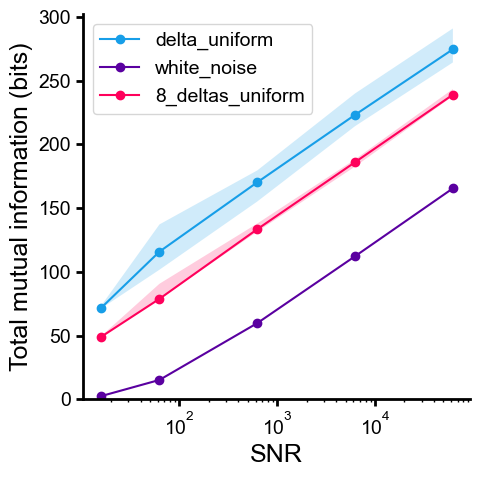

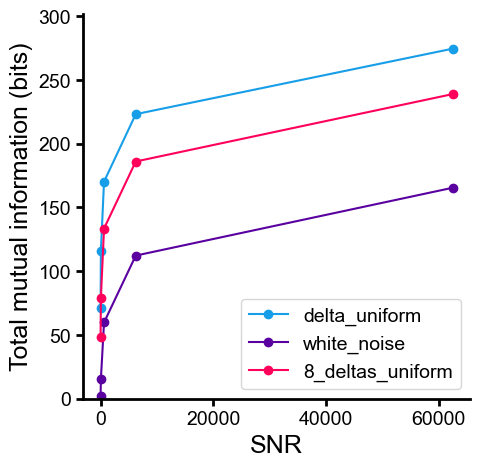

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

snr = (1 / (num_nyquist_samples)) / np.array(noise_sigma_list)

for object_name, mutual_information in mi_by_object.items():
    total_mi = np.array(mutual_information) * num_nyquist_samples
    total_mi_lo = np.array(mi_by_object_lo[object_name]) * num_nyquist_samples
    total_mi_hi = np.array(mi_by_object_hi[object_name]) * num_nyquist_samples

    # ax.plot(num_samples, mutual_information, 'o-')
    ax.semilogx(snr, total_mi, 'o-', label=object_name)
    ax.fill_between(snr, total_mi_lo, total_mi_hi, alpha=0.2)
    ax.set_xlabel('SNR')
    ax.set_ylabel('Total mutual information (bits)')

    ax.set(ylim=(0, max(1.1 * np.max(total_mi), ax.get_ylim()[1])))

clear_spines(ax)
ax.legend()

fig.savefig('/home/hpinkard_waller/figures/1d_signals/' + 'mi_vs_snr_log_scale' + '.pdf', transparent=True, dpi=600)


fig, ax = plt.subplots(1, 1, figsize=(5, 5))

for object_name, mutual_information in mi_by_object.items():
    total_mi = np.array(mutual_information) * num_nyquist_samples

    # ax.plot(num_samples, mutual_information, 'o-')
    ax.plot(snr, total_mi, 'o-', label=object_name)
    ax.set_xlabel('SNR')
    ax.set_ylabel('Total mutual information (bits)')

    ax.set(ylim=(0, max(1.1 * np.max(total_mi), ax.get_ylim()[1])))

clear_spines(ax)
ax.legend()

fig.savefig('/home/hpinkard_waller/figures/1d_signals/' + 'mi_vs_snr_linear_scale' + '.pdf', transparent=True, dpi=600)
